#Introduction
In this notebook we will explore the idea of tensors, creating them, indexing and broadcasting. We will use pytorch - however if you know these concepts from numpy, you should be able to directly apply them in pytorch. We will also put them on a GPU and perform some simple calculations. Finally we will touch very briefly on gradient calculation - a concept essential in deep learning.

#Setup

Before we begin change the Runtime to use a GPU: Click on 'Runtime' --> 'Change Runtime Type' -> from 'Hardware Accelerator' select GPU if it is not already selected.

Now lets check CUDA version and check pytorch installation, run the cells below in turn:

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
!nvidia-smi

Wed Jun  2 06:22:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

You should see that nvcc - cuda compiler has version 10.0 or later and that one GPU is present in the table above, for instance a Tesla K80. Now let's check if pytorch is already installed.

In [ ]:
import torch
if torch is not None:
  print("OK we have pytorch installed")

OK we have pytorch installed


In [ ]:
torch.__version__

'1.8.1+cu101'

If the cell above failed and did not print 'OK we have pytorch installed' there is a problem --> Talk to Wojtek

#Tensors
In this section we will play a bit with pytorch tensors. If you used numpy before this will be very familiar.

In [ ]:
import torch
import numpy as np

## Declaring Tensors

We can declare tensors from lists, numpy arrays, other tensors, or by calling pytorch functions which initialize tensors to certain values (e.g. random, zeros, fill values etc)

In [ ]:
a = torch.tensor([0, 1, 2])
a_float=torch.tensor([0.0,1.0,2.0])
b_np=np.random.randn(3,4,5)
b=torch.tensor(b_np)
c=torch.zeros(3,4,5)
d=torch.randn(3,4,5)
print("Declared tensors:")
print("a: {}".format(a))
print("a_float: {}".format(a_float))
print("b: {}".format(b))
print("c: {}".format(c))
print("d: {}".format(d))

Declared tensors:
a: tensor([0, 1, 2])
a_float: tensor([0., 1., 2.])
b: tensor([[[ 0.3031, -0.9410,  0.8257,  1.7529,  0.0230],
         [-1.6616, -2.4221, -0.9331, -0.8336,  0.8142],
         [ 0.4914,  0.5698,  0.0335,  0.0852, -0.8081],
         [ 0.5341,  0.5830, -0.0974, -1.5876,  0.1284]],

        [[ 1.4968,  0.3382,  0.7454, -1.1311,  1.8682],
         [ 1.4613,  1.4968, -0.9776,  1.3471,  0.7633],
         [ 1.0132, -0.5484,  0.3356, -0.5152,  0.9161],
         [ 2.0261, -0.1662,  0.7628,  0.8990, -0.2767]],

        [[ 0.4614, -0.7658,  0.7489,  0.4006, -0.3454],
         [ 0.4659, -0.5025, -2.2927,  0.1293, -0.4214],
         [-0.0929,  1.0068,  1.2346, -1.3125,  0.1412],
         [ 0.2770, -1.1017, -0.8735, -1.3373,  0.9099]]], dtype=torch.float64)
c: tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
       

## Indexing tensors
indexing works almost identically to numpy indexing including slicing and fancy indexing

In [ ]:
print(d[0,0,0])
print(d[:,1::2,:-1])

tensor(1.7855)
tensor([[[ 0.3474,  0.2213, -0.5474,  0.0227],
         [-0.4600, -1.8857,  2.4509, -1.1097]],

        [[ 1.0533, -1.0894,  1.0459,  0.3627],
         [ 0.5203, -0.3325, -1.8414, -1.1974]],

        [[-0.5813,  1.2096,  0.7305, -0.4683],
         [-1.6131, -0.8555,  0.0778,  0.6956]]])


You may even use tensors to index tensors,

In [ ]:
d[a,a,a]

tensor([ 1.7855, -1.0894, -0.8931])

But - if you do that the tensor you are using to index should be integer type (or long integer). The cell below illustrates this - it will raise `IndexError`

In [ ]:
d[a_float,a_float,a_float]

IndexError: ignored

There is one common pitfall - when you index a particular position in a tensor - you get a '0 dimensional' tensor:

In [ ]:
d[1,1,1]

tensor(-1.0894)

In [ ]:
d[1,1,1].shape

torch.Size([])

To get the actual number we need to use `item()` method

In [ ]:
d[1,1,1].item()

-1.0894254446029663

Pay attention to the datatype of the tensor. Generally we want float32 type tensors for data in deep learning and long integer tensors for labels.

In [ ]:
print(a.dtype)
print(b.dtype)

torch.int64
torch.float64


##Using GPUs
We'll now send some data to the GPU and perform some example calculations

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    d=d.to(device)

In [ ]:
print(d)

tensor([[[ 1.7855, -1.2665, -0.3650,  1.4456, -0.3209],
         [ 0.3474,  0.2213, -0.5474,  0.0227,  0.2400],
         [-0.7765, -1.6931,  0.2010,  0.6905,  1.4738],
         [-0.4600, -1.8857,  2.4509, -1.1097, -0.3352]],

        [[ 0.0301,  0.4167, -0.6072, -0.4291, -0.3082],
         [ 1.0533, -1.0894,  1.0459,  0.3627, -1.5682],
         [ 0.1385, -2.4817, -1.4930,  1.5746, -1.0651],
         [ 0.5203, -0.3325, -1.8414, -1.1974, -0.1034]],

        [[ 0.1694,  0.1755, -0.4775,  1.6110,  0.1575],
         [-0.5813,  1.2096,  0.7305, -0.4683, -0.5576],
         [-0.6264,  0.6378, -0.8931,  1.4489, -0.1900],
         [-1.6131, -0.8555,  0.0778,  0.6956,  0.7473]]], device='cuda:0')


We can now perform some calculations which will be performed by the GPU. For instance element-wise addition:

In [ ]:
e=d+d
print(e)

tensor([[[ 3.5709, -2.5330, -0.7300,  2.8912, -0.6419],
         [ 0.6947,  0.4426, -1.0948,  0.0453,  0.4799],
         [-1.5531, -3.3861,  0.4020,  1.3809,  2.9476],
         [-0.9200, -3.7715,  4.9017, -2.2194, -0.6705]],

        [[ 0.0601,  0.8335, -1.2143, -0.8583, -0.6164],
         [ 2.1066, -2.1789,  2.0918,  0.7253, -3.1363],
         [ 0.2770, -4.9635, -2.9860,  3.1491, -2.1303],
         [ 1.0405, -0.6650, -3.6828, -2.3948, -0.2067]],

        [[ 0.3389,  0.3510, -0.9551,  3.2220,  0.3150],
         [-1.1626,  2.4193,  1.4610, -0.9366, -1.1151],
         [-1.2528,  1.2755, -1.7863,  2.8978, -0.3801],
         [-3.2263, -1.7110,  0.1556,  1.3911,  1.4946]]], device='cuda:0')


As you can see above the output stays on GPU. You can't perform operations on tensors residing on different devices, the next cell will fail.

In [ ]:
c+d

RuntimeError: ignored

##Tensor operations, shape and reshaping
In the cells above we performed a element-wise addition using `+` -  but this is overloaded `add()` function. You can take a look at the available operations [here](https://pytorch.org/docs/stable/tensors.html#torch.Tensor). Most of the available operations have an in-place version - the convention is that the name of that operation ends with `_`. The output of these will be assigned to the tensor the operation is called on. This can save some memory but can be a bit [tricky](https://pytorch.org/docs/stable/notes/autograd.html#in-place-operations-with-autograd) if we use the tensor to calculate gradients. The cell below illustrates how to use both styles.

In [ ]:
dcpy=d.clone()
d_plus_d=d.add(d)

dcpy.add_(dcpy)
print("d_plus_d: {}\n\ndcpy: {}".format(d_plus_d,dcpy))

d_plus_d: tensor([[[ 3.5709, -2.5330, -0.7300,  2.8912, -0.6419],
         [ 0.6947,  0.4426, -1.0948,  0.0453,  0.4799],
         [-1.5531, -3.3861,  0.4020,  1.3809,  2.9476],
         [-0.9200, -3.7715,  4.9017, -2.2194, -0.6705]],

        [[ 0.0601,  0.8335, -1.2143, -0.8583, -0.6164],
         [ 2.1066, -2.1789,  2.0918,  0.7253, -3.1363],
         [ 0.2770, -4.9635, -2.9860,  3.1491, -2.1303],
         [ 1.0405, -0.6650, -3.6828, -2.3948, -0.2067]],

        [[ 0.3389,  0.3510, -0.9551,  3.2220,  0.3150],
         [-1.1626,  2.4193,  1.4610, -0.9366, -1.1151],
         [-1.2528,  1.2755, -1.7863,  2.8978, -0.3801],
         [-3.2263, -1.7110,  0.1556,  1.3911,  1.4946]]], device='cuda:0')

dcpy: tensor([[[ 3.5709, -2.5330, -0.7300,  2.8912, -0.6419],
         [ 0.6947,  0.4426, -1.0948,  0.0453,  0.4799],
         [-1.5531, -3.3861,  0.4020,  1.3809,  2.9476],
         [-0.9200, -3.7715,  4.9017, -2.2194, -0.6705]],

        [[ 0.0601,  0.8335, -1.2143, -0.8583, -0.6164],
      

For future reference we will clone tensor d

In [ ]:
dcpy=d.clone()

Often we will need to change shape of the tensor. We have two options to find a shape of a tensor `size()` and `shape`- these are completely equivalent

In [ ]:
print(d.shape)
print(d.size())

torch.Size([3, 4, 5])
torch.Size([3, 4, 5])


To change tensor shapes we have two options: `view` and `reshape`.  `view` as the name implies gives you a pointer to the same memory location but with adjusted 'strides' so that the shape is as you specify i.e. a new 'view' of the same data. On the other hand `reshape` will give you a view of a tensor, if it is possible (i.e. if the tensor's memory is contiguous), or a copy if it is not. As a rule of thumb avoid using `reshape`. If a copy of a tensor is needed with explicit new (contiguous) memory allocation use `clone`. The cells below give some examples

In [ ]:
'''
lets unroll the first dimension of d and rearrange the last two dimensions.
Giving -1 as a parameter, just like in numpy reshape,
will figure out what the dimension ought to be
'''
d_unroll_reshape=d.view(5,-1)
print(d)
print(d_unroll_reshape)


tensor([[[ 1.7855, -1.2665, -0.3650,  1.4456, -0.3209],
         [ 0.3474,  0.2213, -0.5474,  0.0227,  0.2400],
         [-0.7765, -1.6931,  0.2010,  0.6905,  1.4738],
         [-0.4600, -1.8857,  2.4509, -1.1097, -0.3352]],

        [[ 0.0301,  0.4167, -0.6072, -0.4291, -0.3082],
         [ 1.0533, -1.0894,  1.0459,  0.3627, -1.5682],
         [ 0.1385, -2.4817, -1.4930,  1.5746, -1.0651],
         [ 0.5203, -0.3325, -1.8414, -1.1974, -0.1034]],

        [[ 0.1694,  0.1755, -0.4775,  1.6110,  0.1575],
         [-0.5813,  1.2096,  0.7305, -0.4683, -0.5576],
         [-0.6264,  0.6378, -0.8931,  1.4489, -0.1900],
         [-1.6131, -0.8555,  0.0778,  0.6956,  0.7473]]], device='cuda:0')
tensor([[ 1.7855, -1.2665, -0.3650,  1.4456, -0.3209,  0.3474,  0.2213, -0.5474,
          0.0227,  0.2400, -0.7765, -1.6931],
        [ 0.2010,  0.6905,  1.4738, -0.4600, -1.8857,  2.4509, -1.1097, -0.3352,
          0.0301,  0.4167, -0.6072, -0.4291],
        [-0.3082,  1.0533, -1.0894,  1.0459,  0.362

As you can see pytorch figured out that the last dimension should be 12. Again beware - the tensors `d` and `d_unroll_reshape` share data. Let's modify one element in `d` and watch it change in `d_unroll_reshape`

In [ ]:
d[0,2,1]=42.0
print(d_unroll_reshape[0,-1])

tensor(42., device='cuda:0')


Use `clone` if you want brand new memory for the tensor. You can of course stack the operations -e.g. view and then clone. Now changing one will not affect the other.

In [ ]:
d_unroll_reshape_cloned=d.view(5,-1).clone()
d_unroll_reshape_cloned[0,-1]=1984.0
print(d[0,2,1])

tensor(42., device='cuda:0')


Some operations will make the tensor non-contiguous. For instance the transpose operation. The data in memory will not be touched, just the strides affected. This means that it is impossible to get a different view of the tensor. Transposing the last two dimensions:



In [ ]:
d.transpose_(1,2)

tensor([[[ 1.7855e+00,  3.4737e-01, -7.7654e-01, -4.5999e-01],
         [-1.2665e+00,  2.2131e-01,  4.2000e+01, -1.8857e+00],
         [-3.6501e-01, -5.4738e-01,  2.0100e-01,  2.4509e+00],
         [ 1.4456e+00,  2.2662e-02,  6.9046e-01, -1.1097e+00],
         [-3.2093e-01,  2.3996e-01,  1.4738e+00, -3.3523e-01]],

        [[ 3.0069e-02,  1.0533e+00,  1.3850e-01,  5.2026e-01],
         [ 4.1673e-01, -1.0894e+00, -2.4817e+00, -3.3251e-01],
         [-6.0717e-01,  1.0459e+00, -1.4930e+00, -1.8414e+00],
         [-4.2913e-01,  3.6265e-01,  1.5746e+00, -1.1974e+00],
         [-3.0819e-01, -1.5682e+00, -1.0651e+00, -1.0336e-01]],

        [[ 1.6945e-01, -5.8128e-01, -6.2638e-01, -1.6131e+00],
         [ 1.7549e-01,  1.2096e+00,  6.3776e-01, -8.5548e-01],
         [-4.7754e-01,  7.3048e-01, -8.9313e-01,  7.7793e-02],
         [ 1.6110e+00, -4.6828e-01,  1.4489e+00,  6.9555e-01],
         [ 1.5749e-01, -5.5755e-01, -1.9005e-01,  7.4730e-01]]],
       device='cuda:0')

After the transpose the entries in a single 'row' in the above tensor are not 'neighbours' in memory - the two numbers in the column are - so we can not reshape the tensor easliy;
This will fail:

In [ ]:
d_back_to_original_shape=d.view(3,4,5)

RuntimeError: ignored

We need to copy the tensor to contiguous memory space and then we can reshape it

In [ ]:
d_back_to_original_shape=d.contiguous().view(3,4,5)

Back close to the start we made a copy of d naming it `dcpy`. Lets print it now alongside d. Notice the difference in the tensors after all these reshaping operations? Do you understand what happened?

In [ ]:
print("dcpy: {}".format(dcpy))
print("d_back_to_original_shape: {}".format(d_back_to_original_shape))

dcpy: tensor([[[ 1.7855, -1.2665, -0.3650,  1.4456, -0.3209],
         [ 0.3474,  0.2213, -0.5474,  0.0227,  0.2400],
         [-0.7765, -1.6931,  0.2010,  0.6905,  1.4738],
         [-0.4600, -1.8857,  2.4509, -1.1097, -0.3352]],

        [[ 0.0301,  0.4167, -0.6072, -0.4291, -0.3082],
         [ 1.0533, -1.0894,  1.0459,  0.3627, -1.5682],
         [ 0.1385, -2.4817, -1.4930,  1.5746, -1.0651],
         [ 0.5203, -0.3325, -1.8414, -1.1974, -0.1034]],

        [[ 0.1694,  0.1755, -0.4775,  1.6110,  0.1575],
         [-0.5813,  1.2096,  0.7305, -0.4683, -0.5576],
         [-0.6264,  0.6378, -0.8931,  1.4489, -0.1900],
         [-1.6131, -0.8555,  0.0778,  0.6956,  0.7473]]], device='cuda:0')
d_back_to_original_shape: tensor([[[ 1.7855e+00,  3.4737e-01, -7.7654e-01, -4.5999e-01, -1.2665e+00],
         [ 2.2131e-01,  4.2000e+01, -1.8857e+00, -3.6501e-01, -5.4738e-01],
         [ 2.0100e-01,  2.4509e+00,  1.4456e+00,  2.2662e-02,  6.9046e-01],
         [-1.1097e+00, -3.2093e-01,  2.3996e-

#Broadcasting

A very useful feature of numpy and torch tensors is the ability to broadcast. It is a mechanism where operations on pairs of tensors of different dimensionalities can be performed without making explicit memory copies - making these operations much faster.

Rules for broadcasting are  the same as in numpy.
[This](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) Is a pretty good reference if you want to dig deeper.

There are three rules of broadcasting:
   1. If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
   1. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
   1.If in any dimension the sizes disagree and neither is equal to 1, an error is raised.  
   Lets look at a few examples:

In [ ]:
a = torch.arange(3).to(device)

b = torch.arange(3).to(device).view(-1,1).contiguous()

In [ ]:
print(a)
print(b)

tensor([0, 1, 2], device='cuda:0')
tensor([[0],
        [1],
        [2]], device='cuda:0')


In [ ]:
c=a+b #Rule 1 was used first to make a (1,3) Rule 2 was used twice - to 'expand' a into (3,3) and b from (3,1) to (3,3) - now dimensions match and + can be performed element-wise

In [ ]:
print(c)

tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4]], device='cuda:0')


In [ ]:
d=c+a #here Rule 1 was used to expand a into (1,3) and then Rule 2 to stretch it to (3,3)

In [ ]:
print(d)

tensor([[0, 2, 4],
        [1, 3, 5],
        [2, 4, 6]], device='cuda:0')


Remember that the dimension is always 'prepended' to the list of dimensions. So this will not work because broadcast will try to turn `a` into (1,3,4) size tensor. Size 1 could be broadcast over the first dimension of `b`, but the second dimensions (3 and 4) are not matching.

In [ ]:
a=torch.arange(3*4).to(device).view(3,4).contiguous()
b=torch.arange(3*4*5).to(device).view(3,4,5).contiguous()
a+b

RuntimeError: ignored

If the intention was to broadcast over the last dimension we need to add dimension to tensor a. A common method to do this is to `unsqueeze` it

In [ ]:
print(a)
a.unsqueeze_(-1)
print(a)
print(a.size())

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]], device='cuda:0')
tensor([[[ 0],
         [ 1],
         [ 2],
         [ 3]],

        [[ 4],
         [ 5],
         [ 6],
         [ 7]],

        [[ 8],
         [ 9],
         [10],
         [11]]], device='cuda:0')
torch.Size([3, 4, 1])


Now the broadcast will work:

In [ ]:
a+b

tensor([[[ 0,  1,  2,  3,  4],
         [ 6,  7,  8,  9, 10],
         [12, 13, 14, 15, 16],
         [18, 19, 20, 21, 22]],

        [[24, 25, 26, 27, 28],
         [30, 31, 32, 33, 34],
         [36, 37, 38, 39, 40],
         [42, 43, 44, 45, 46]],

        [[48, 49, 50, 51, 52],
         [54, 55, 56, 57, 58],
         [60, 61, 62, 63, 64],
         [66, 67, 68, 69, 70]]], device='cuda:0')

#Backpropagation
The most common method to train neural networks employs backpropagation - i.e. evaluation of gradients of some function (usually the loss function) with respect to tensors that form the network parameters. Pytorch accomplishes this by building up a computational graph of all the operations as they are performed. Each tensor holds the information of what tensors were it's the sources and the operations used to make this tensor from the source tensors. Pytorch operations provide a functionality to compute the gradient of output with respect to input. Pytorch will than work backward from the root node i.e. the final tensor or 'backpropagate' to compute the gradient of the final tensor with respect to the input tensors or 'leaves' of the graph. This is really just chain rule - but thinking of the computation as a graph allows for automation of the whole process.  For this process to work the final value that we will ask pytorch to compute gradients for should be a scalar (It is possible to calculate gradients of non-scalar tensors - but we will not cover it here as it is not used very often)  


First we'll install a tool that will help us visualize a simple graph

In [ ]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4152 sha256=11b2da80f5900dbf4534690566176be068076acc3c94447747cb8f4b01cb3648
  Stored in directory: /root/.cache/pip/wheels/01/26/58/026ffd533dbe8b3972eb423da9c7949beca68d1c98ed9e8624
Successfully built torchviz


In [ ]:
from torchviz import make_dot

Now let's define two tensors and make a few computations arriving finally at a scalar tensor. Notice that we need to call `requires_grad_` on the leaf tensors. Normally tensors do not require that the gradients are computed with respect to them unless they are parameters of a neural network.

In [ ]:
a=torch.arange(4,dtype=torch.float32).to(device).view(2,2).contiguous()
a.requires_grad_()
b=torch.zeros(2,2).to(device)
b.requires_grad_()
c=2*a**2+b
d=c.sum()
print('a: {}'.format(a))
print('b: {}'.format(b))
print('c: {}'.format(c))
print('d: {}'.format(d))


a: tensor([[0., 1.],
        [2., 3.]], device='cuda:0', requires_grad=True)
b: tensor([[0., 0.],
        [0., 0.]], device='cuda:0', requires_grad=True)
c: tensor([[ 0.,  2.],
        [ 8., 18.]], device='cuda:0', grad_fn=<AddBackward0>)
d: 28.0


Here is our computational graph

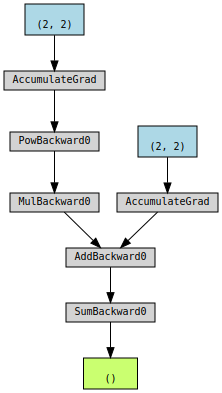

In [ ]:
make_dot(d)

Now we can compute the gradients with respect to `a` and `b` evaluated at the values of `a` and `b` that entered the computation

In [ ]:
d.backward()

In [ ]:
print('gradient with respect to a:\n {}'.format(a.grad))
print('gradient with respect to b:\n {}'.format(b.grad))

gradient with respect to a:
 tensor([[ 0.,  4.],
        [ 8., 12.]], device='cuda:0')
gradient with respect to b:
 tensor([[1., 1.],
        [1., 1.]], device='cuda:0')


Make sure you can work out how these were computed and play around with modifying the inputs and the sequence of operations.  

Congrats - you are in good shape to do some deep learning now!